In [2]:
##Importing the ncessary libraries
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
#Importing the Tesla data
#df = pdr.get_data_yahoo(symbols='TSLA', start=datetime(2010, 6, 29), end=datetime(2023, 9, 17))
df = yf.download('TSLA', start = '2010-06-29', end='2023-09-17')

df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-09-11,264.269989,274.850006,260.609985,273.579987,273.579987,174667900
2023-09-12,270.760010,278.390015,266.600006,267.480011,267.480011,135999900
2023-09-13,270.070007,274.980011,268.100006,271.299988,271.299988,111673700


In [5]:
##Checking for any Null Values
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
##Saving the downloaded dataset into a csv file
df.to_csv('TSLA.csv')

### Data Visualization

<Axes: xlabel='Date'>

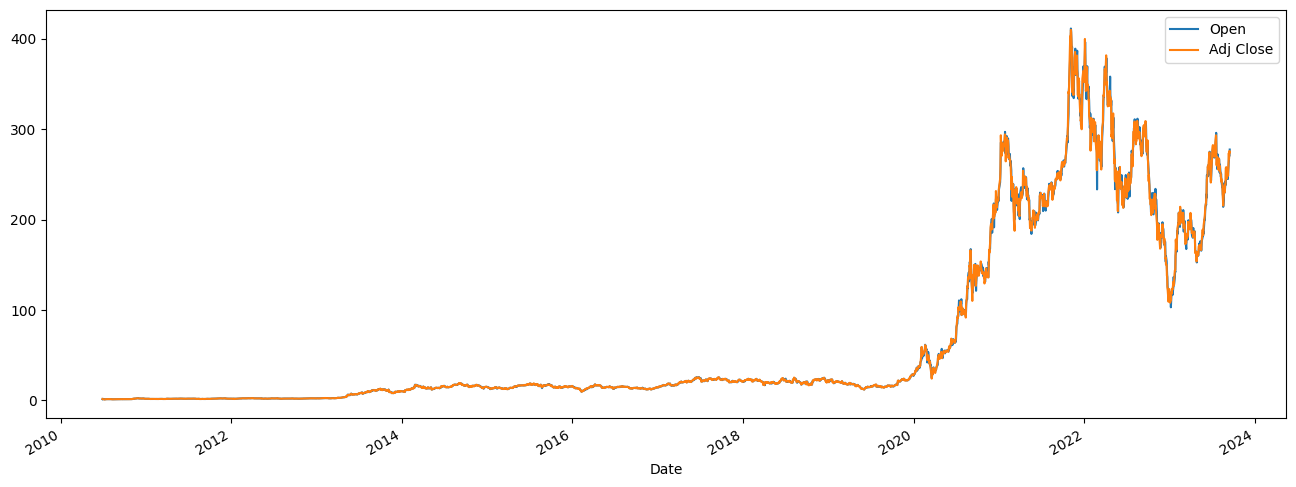

In [11]:
##Will change to an interactive graph
df[['Open', 'Adj Close']].plot(figsize=(16,6))

### Data Preprocessing

In [12]:
##Train-test split
from sklearn.model_selection import train_test_split
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=0)

In [13]:
X_train

,Open,High,Low,Volume
Date,,,,
2019-08-26,14.240000,14.334667,14.102667,75778500
2015-12-01,15.404000,15.866667,15.403333,56010000
2015-11-05,15.372000,15.638667,15.279333,67452000
2013-06-17,6.906667,6.983333,6.746667,105993000
2016-12-27,14.325333,14.816667,14.294667,88735500
...,...,...,...,...
2013-10-22,11.366667,11.852000,11.074000,170800500
2023-06-16,258.920013,263.600006,257.209991,167563700
2017-01-23,16.389999,16.726000,16.366667,93943500


### Linear Regression Model

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

model = reg.fit(X_train, y_train)

In [15]:
model.coef_

array([-6.79052215e-01,  8.46641865e-01,  8.32545708e-01,  5.45163803e-10])

In [16]:
model.intercept_

-0.01951945831252999

In [18]:
##Prediction and predicted values
predictions = reg.predict(X_test)
predictions

array([ 20.05902794, 358.58791083,  10.33366021,  20.91662405,
       220.59552675,  13.94656307, 221.23766858,  21.91966118,
         2.08336389,  37.41873135,   2.21042248,   3.12735356,
        18.21706799, 164.2189056 , 228.81121721,  13.53564906,
         1.93084238,   1.30828949,  19.84944676,  49.78402045,
         9.91812652, 226.63256236,  23.91538335,  12.64932377,
        67.75530749,  14.9991556 ,  17.47339507, 180.8334833 ,
       259.22860544,  14.81963434,   2.01057856,   1.95571766,
       205.52971158,   2.28244971,   1.22382841, 193.27740501,
        21.74183808,  20.71958034,  14.91035987,  18.50354606,
        13.84182189, 270.29182819,   2.5044372 ,  16.49650928,
        13.29284331, 160.16990808,  95.99129568,  24.09238543,
         1.87974831, 305.11053285,   2.10328142,   1.8977153 ,
         3.00366433, 178.07759941, 263.34544108, 237.03108116,
       237.09135002, 212.60628614,   2.25465244,  14.38411959,
         8.6367033 ,  23.34185807, 201.58770962,  28.86

In [21]:
from sklearn.metrics import

ValueError: Classification metrics can't handle a mix of continuous-multioutput and continuous targets

In [22]:
dfr=pd.DataFrame({'Actual':y_test,'Predicted':predictions})
dfr

,Actual,Predicted
Date,,
2019-02-08,20.386667,20.059028
2021-12-02,361.533325,358.587911
2013-12-24,10.094000,10.333660
2017-05-25,21.122000,20.916624
2021-03-18,217.720001,220.595527
...,...,...
2014-09-25,16.463333,16.638349
2023-08-10,245.339996,248.893797
2019-09-11,16.473333,16.422504


In [ ]:
dfr.sort()